##### Overview:

##### This notebook utilizes Selenium and BeautifulSoup for web scraping to gather detailed information about flight arrivals at the Tunis-Carthage airport.

##### Key Steps:

##### Base URL and Initialization:

The base_url is defined as the starting point for the web scraping.
An empty list, data, is initialized to store the extracted information.

##### Loop through Days:

The script iterates through each day of October 2023.

##### First Scraping Loop:

Visits the URL for each day and extracts the flight numbers (N° de Vol) from the table.

##### Unique Flight Numbers:

Removes duplicate flight numbers from the list.

##### Second Scraping Loop:

For each unique flight number, it visits the corresponding URL and extracts detailed information about each flight.
Information includes date, local time, origin, airline, flight number, status, and punctuality.

##### Data Storage:

The extracted data is stored in dictionaries and appended to the data list.

##### Project Purpose:

The purpose of this notebook is to collect and organize data on flight arrivals at the Tunis-Carthage airport for analysis or further processing. The resulting data list contains a dictionary for each flight, with detailed information such as date, time, origin, airline, and flight status.






In [ ]:
# Initialize the Chrome webdriver
from selenium import webdriver
driver = webdriver.Chrome()

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [ ]:
driver.set_script_timeout(30)

In [ ]:

# Define the base URL
base_url = "http://www.aeroport-de-tunis-carthage.com/tunisie-aeroport-de-tunis-carthage-vol-arrivee-"

# Initialize a list to store the data
data = []
data_ = []

# Loop through the days of October 2023
for day in range(1,30):  # October

    # Construct the URL for the specific date
    url = base_url + "date-2023-10-"+ str(day) 

    driver.implicitly_wait(100)
    driver.get(url)
    soup=BeautifulSoup(driver.page_source, 'lxml')

    table = soup.find("table", width="100%")


    # Loop through the rows of the table
    for row in table.find_all("tr"):
        
        #row_data = {"Date": f"2023-10-{day:02d}"}
        row_data = {"Date": f"2023-10-{day:02d}"}
        cells = row.find_all("td")
        if len(cells) == 5:  # Check if there are 7 cells (your table structure)
            row_data["N° de Vol"] = cells[3].text.strip()
            data.append(row_data)
    num_de_vol_list = [entry['N° de Vol'] for entry in data]
    unique_num_de_vol_list = list(set(num_de_vol_list))

    
            
            
   # Loop through the list of "N° de Vol" values
    for num_de_vol in unique_num_de_vol_list:
        url = base_url + "numero-" + num_de_vol + "-date-2023-10-"+ str(day)
        driver.implicitly_wait(100)
        driver.get(url)
        soup = BeautifulSoup(driver.page_source, 'lxml')
        table = soup.find("table", width="100%")
       

        # Loop through the rows of the table
        for row in table.find_all("tr"):
            # Initialize a dictionary to store the data for each row
            row_data = {}         #row_data = {"Date": f"2023-10-{day:02d}"}
            cells = row.find_all("td")
            if len(cells) == 7:  # Check if there are 7 cells (your table structure)
                row_data["Date"] = cells[0].text.strip()
                row_data["Heure Locale"] = cells[1].text.strip()
                row_data["Origine"] = cells[2].text.strip()
                row_data["Compagnie"] = cells[3].text.strip()
                row_data["N° de Vol"] = cells[4].text.strip()
                row_data["Statut"] = cells[5].text.strip()
                row_data["Ponctualité"] = cells[6].text.strip()
                data.append(row_data)

# Close the browser

# Now, 'data' contains a list of dictionaries, where each dictionary represents data for a specific day in October 2023

# You can print the data or further process it as needed
for entry in data:
    print(entry)

In [ ]:
data

In [ ]:
list_of_lists = []
# Iterate through each entry in the 'data' list
for entry in data:
    # Extract specific values from each dictionary and create a row list
    row = [entry['Date'], entry['Heure Locale'], entry['Origine'], entry['Compagnie'], entry['N° de Vol'], entry['Statut'], entry['Ponctualité']]
    list_of_lists.append(row)

# Display the list of lists
list_of_lists

In [ ]:
# Create a DataFrame from the list_of_lists
df = pd.DataFrame(list_of_lists)

In [ ]:
print(df)

In [ ]:
# Define a new list of column names
new_column_names = ['Date', 'Heure Locale', 'Origine', 'Compagnie', 'N° de Vol', 'Statut', 'Ponctualité']

# Assign the new column names to the DataFrame
df.columns = new_column_names

In [ ]:
df

In [ ]:
# Extracting delay information from 'Ponctualité' column and calculating delay in minutes
df['Retard'] = df['Ponctualité'].str.extract(r'(\d+) heure').astype(float) * 60 + df['Ponctualité'].str.extract(r'(\d+) minute').astype(float)

In [ ]:
# Extract numeric delay values from "Ponctualité" column and convert to minutes
hours = df['Ponctualité'].str.extract(r'(\d+) heure').astype(float).fillna(0)
minutes = df['Ponctualité'].str.extract(r'(\d+) minute').astype(float).fillna(0)
df['Retard'] = (hours * 60 + minutes) / 60  # Divide by 60 to convert to hours


In [41]:
df


,Date,Heure Locale,Origine,Compagnie,N° de Vol,Statut,Ponctualité,Retard
0,2023-11-10,08:45:00,MITIGA,GHADAMES AIR,NJ411,ATTERRI 09:03,Retard de 18 minutes,0.300000
1,2023-11-09,08:50:00,MITIGA,GHADAMES AIR,NJ411,ATTERRI 10:08,Retard de 1 heure et 18 minutes,1.300000
2,2023-11-08,09:00:00,MITIGA,GHADAMES AIR,NJ411,ATTERRI 09:13,Retard de 13 minutes,0.216667
3,2023-11-07,08:45:00,MITIGA,GHADAMES AIR,NJ411,ATTERRI 09:04,Retard de 19 minutes,0.316667
4,2023-11-06,11:10:00,MITIGA,GHADAMES AIR,NJ411,ATTERRI 11:27,Retard de 17 minutes,0.283333
...,...,...,...,...,...,...,...,...
2766,2023-10-14,17:00:00,ALGER,AIR ALGERIE,AH4002,ATTERRI 17:47,Retard de 47 minutes,0.783333
2767,2023-10-13,17:00:00,ALGER,AIR ALGERIE,AH4002,ATTERRI 17:00,Aucun retard,0.000000
2768,2023-10-12,18:10:00,ALGER,AIR ALGERIE,AH4002,ATTERRI 18:07,Aucun retard,0.000000
2769,2023-10-11,18:10:00,ALGER,AIR ALGERIE,AH4002,ATTERRI 19:47,Retard de 1 heure et 37 minutes,1.616667


In [ ]:
# Convert the 'Date' column to datetime format, 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%Y-%m-%d')

In [51]:
df

,Date,Heure Locale,Origine,Compagnie,N° de Vol,Statut,Ponctualité,Retard
0,2023-11-10,08:45:00,MITIGA,GHADAMES AIR,NJ411,ATTERRI 09:03,Retard de 18 minutes,0.300000
1,2023-11-09,08:50:00,MITIGA,GHADAMES AIR,NJ411,ATTERRI 10:08,Retard de 1 heure et 18 minutes,1.300000
2,2023-11-08,09:00:00,MITIGA,GHADAMES AIR,NJ411,ATTERRI 09:13,Retard de 13 minutes,0.216667
3,2023-11-07,08:45:00,MITIGA,GHADAMES AIR,NJ411,ATTERRI 09:04,Retard de 19 minutes,0.316667
4,2023-11-06,11:10:00,MITIGA,GHADAMES AIR,NJ411,ATTERRI 11:27,Retard de 17 minutes,0.283333
...,...,...,...,...,...,...,...,...
2766,2023-10-14,17:00:00,ALGER,AIR ALGERIE,AH4002,ATTERRI 17:47,Retard de 47 minutes,0.783333
2767,2023-10-13,17:00:00,ALGER,AIR ALGERIE,AH4002,ATTERRI 17:00,Aucun retard,0.000000
2768,2023-10-12,18:10:00,ALGER,AIR ALGERIE,AH4002,ATTERRI 18:07,Aucun retard,0.000000
2769,2023-10-11,18:10:00,ALGER,AIR ALGERIE,AH4002,ATTERRI 19:47,Retard de 1 heure et 37 minutes,1.616667


In [56]:
df['Day'] = df['Date'].dt.day
df

,Date,Heure Locale,Origine,Compagnie,N° de Vol,Statut,Ponctualité,Retard,Day
0,2023-11-10,08:45:00,MITIGA,GHADAMES AIR,NJ411,ATTERRI 09:03,Retard de 18 minutes,0.300000,10
1,2023-11-09,08:50:00,MITIGA,GHADAMES AIR,NJ411,ATTERRI 10:08,Retard de 1 heure et 18 minutes,1.300000,9
2,2023-11-08,09:00:00,MITIGA,GHADAMES AIR,NJ411,ATTERRI 09:13,Retard de 13 minutes,0.216667,8
3,2023-11-07,08:45:00,MITIGA,GHADAMES AIR,NJ411,ATTERRI 09:04,Retard de 19 minutes,0.316667,7
4,2023-11-06,11:10:00,MITIGA,GHADAMES AIR,NJ411,ATTERRI 11:27,Retard de 17 minutes,0.283333,6
...,...,...,...,...,...,...,...,...,...
2766,2023-10-14,17:00:00,ALGER,AIR ALGERIE,AH4002,ATTERRI 17:47,Retard de 47 minutes,0.783333,14
2767,2023-10-13,17:00:00,ALGER,AIR ALGERIE,AH4002,ATTERRI 17:00,Aucun retard,0.000000,13
2768,2023-10-12,18:10:00,ALGER,AIR ALGERIE,AH4002,ATTERRI 18:07,Aucun retard,0.000000,12
2769,2023-10-11,18:10:00,ALGER,AIR ALGERIE,AH4002,ATTERRI 19:47,Retard de 1 heure et 37 minutes,1.616667,11


In [57]:
rows_with_day_zero = df[df['Day'] == 0]
print(rows_with_day_zero)

     Date  Heure Locale  Origine  Compagnie  N° de Vol  Statut  Ponctualité  \
30    NaT  Heure Locale  Origine  Compagnie  N° de Vol  Statut  Ponctualité   
61    NaT  Heure Locale  Origine  Compagnie  N° de Vol  Statut  Ponctualité   
92    NaT  Heure Locale  Origine  Compagnie  N° de Vol  Statut  Ponctualité   
123   NaT  Heure Locale  Origine  Compagnie  N° de Vol  Statut  Ponctualité   
154   NaT  Heure Locale  Origine  Compagnie  N° de Vol  Statut  Ponctualité   
...   ...           ...      ...        ...        ...     ...          ...   
2616  NaT  Heure Locale  Origine  Compagnie  N° de Vol  Statut  Ponctualité   
2647  NaT  Heure Locale  Origine  Compagnie  N° de Vol  Statut  Ponctualité   
2678  NaT  Heure Locale  Origine  Compagnie  N° de Vol  Statut  Ponctualité   
2709  NaT  Heure Locale  Origine  Compagnie  N° de Vol  Statut  Ponctualité   
2740  NaT  Heure Locale  Origine  Compagnie  N° de Vol  Statut  Ponctualité   

      Retard  Day  
30       0.0    0  
61       0.

In [ ]:
#Removed rows with missing values in the 'Date' column.
df = df[df['Date'].notna()]

In [63]:
df

,Date,Heure Locale,Origine,Compagnie,N° de Vol,Statut,Ponctualité,Retard,Day
0,2023-11-10,08:45:00,MITIGA,GHADAMES AIR,NJ411,ATTERRI 09:03,Retard de 18 minutes,0.300000,10
1,2023-11-09,08:50:00,MITIGA,GHADAMES AIR,NJ411,ATTERRI 10:08,Retard de 1 heure et 18 minutes,1.300000,9
2,2023-11-08,09:00:00,MITIGA,GHADAMES AIR,NJ411,ATTERRI 09:13,Retard de 13 minutes,0.216667,8
3,2023-11-07,08:45:00,MITIGA,GHADAMES AIR,NJ411,ATTERRI 09:04,Retard de 19 minutes,0.316667,7
4,2023-11-06,11:10:00,MITIGA,GHADAMES AIR,NJ411,ATTERRI 11:27,Retard de 17 minutes,0.283333,6
...,...,...,...,...,...,...,...,...,...
2766,2023-10-14,17:00:00,ALGER,AIR ALGERIE,AH4002,ATTERRI 17:47,Retard de 47 minutes,0.783333,14
2767,2023-10-13,17:00:00,ALGER,AIR ALGERIE,AH4002,ATTERRI 17:00,Aucun retard,0.000000,13
2768,2023-10-12,18:10:00,ALGER,AIR ALGERIE,AH4002,ATTERRI 18:07,Aucun retard,0.000000,12
2769,2023-10-11,18:10:00,ALGER,AIR ALGERIE,AH4002,ATTERRI 19:47,Retard de 1 heure et 37 minutes,1.616667,11


#### Overview of the DataFrame:

In [68]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2680 entries, 0 to 2770
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2680 non-null   datetime64[ns]
 1   Heure Locale  2680 non-null   object        
 2   Origine       2680 non-null   object        
 3   Compagnie     2680 non-null   object        
 4   N° de Vol     2680 non-null   object        
 5   Statut        2680 non-null   object        
 6   Ponctualité   2680 non-null   object        
 7   Retard        2680 non-null   float64       
 8   Day           2680 non-null   int32         
 9   Month         2680 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(6)
memory usage: 209.4+ KB


Date            0
Heure Locale    0
Origine         0
Compagnie       0
N° de Vol       0
Statut          0
Ponctualité     0
Retard          0
Day             0
Month           0
dtype: int64

### Data analysis

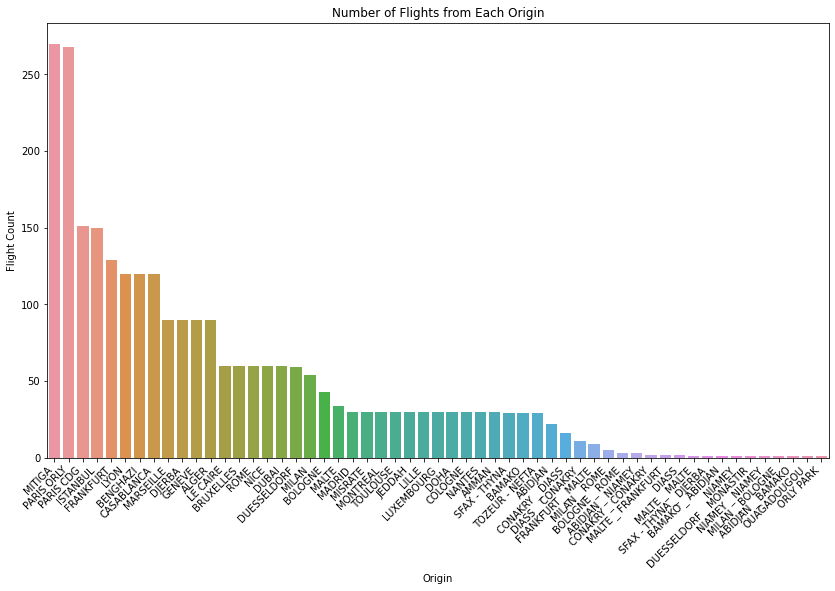

In [71]:
# Plot the number of flights from each origin
plt.figure(figsize=(14, 8))
sns.countplot(x='Origine', data=df, order=df['Origine'].value_counts().index)
plt.title('Number of Flights from Each Origin')
plt.xlabel('Origin')
plt.ylabel('Flight Count')
plt.xticks(rotation=45, ha='right')
plt.show()

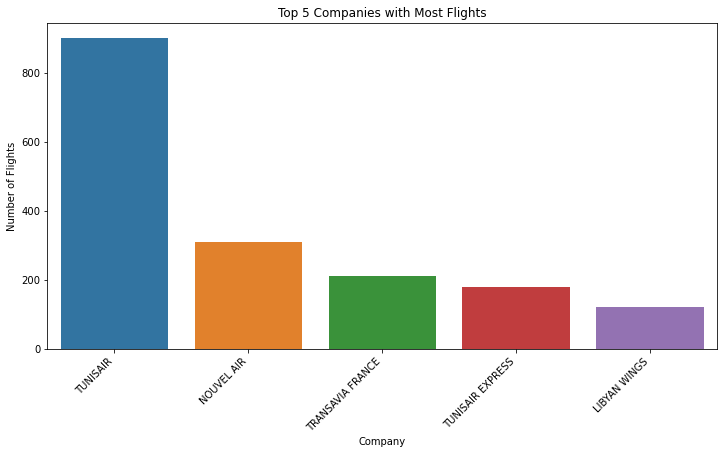

In [72]:
# Plot the top 5 companies with the most flights
plt.figure(figsize=(12, 6))
top_companies = df['Compagnie'].value_counts().nlargest(5)
sns.barplot(x=top_companies.index, y=top_companies.values)
plt.title('Top 5 Companies with Most Flights')
plt.xlabel('Company')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.show()

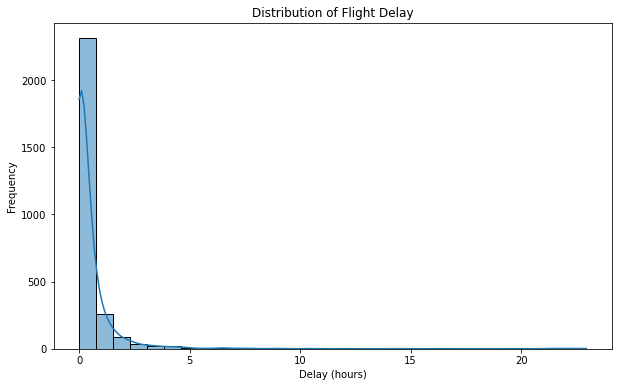

In [44]:
# Plot a histogram of the delay distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Retard'], bins=30, kde=True)
plt.title('Distribution of Flight Delay')
plt.xlabel('Delay (hours)')
plt.ylabel('Frequency')
plt.show()


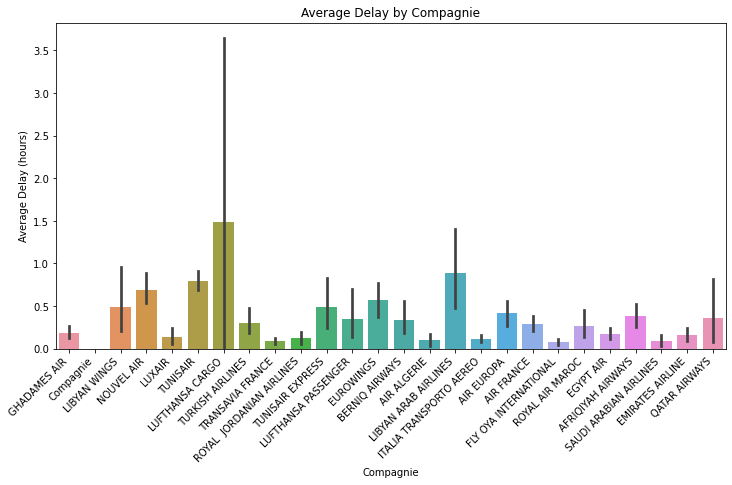

In [46]:
# Plot the average delay for each Compagnie
plt.figure(figsize=(12, 6))
sns.barplot(x='Compagnie', y='Retard', data=df)
plt.title('Average Delay by Compagnie')
plt.xlabel('Compagnie')
plt.ylabel('Average Delay (hours)')
plt.xticks(rotation=45, ha='right')
plt.show()

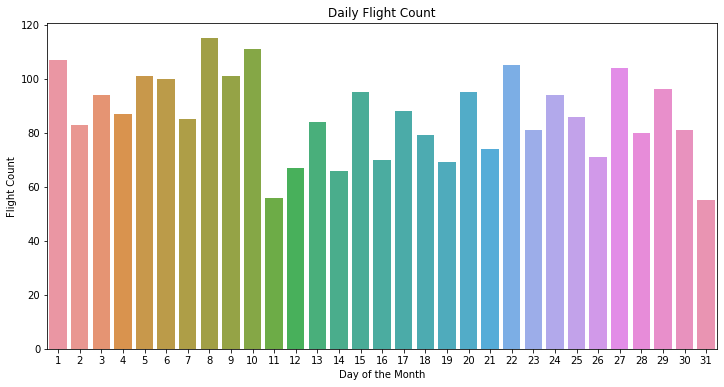

In [67]:
# Plot the daily flight count
plt.figure(figsize=(12, 6))
sns.countplot(x='Day', data=df.sort_values('Day'))
plt.title('Daily Flight Count')
plt.xlabel('Day of the Month')
plt.ylabel('Flight Count')
plt.show()